### Test LinUCB and ThresholdBandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

In [3]:
alphas = (0, 2)
betas = (1, 0)
params = LinearGeneratorParams(alphas, betas)
generator = LinearGenerator(params)

### LinUCB 

In [5]:
linucb = LinUCB(generator)
for i in range(4000):
	(ctx, arm_idx, obs, regret) = linucb.step()

theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

[[ 0.02836178]
 [ 1.96047913]
 [ 0.99142178]
 [ 0.01836022]]


In [6]:
#Make plots of LinUCB confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = linucb.predict(xvals[i], arm_idx)
        preds_up[i,arm_idx] = linucb.predict_upper(xvals[i], arm_idx)
        preds_low[i,arm_idx] = linucb.predict_lower(xvals[i], arm_idx)

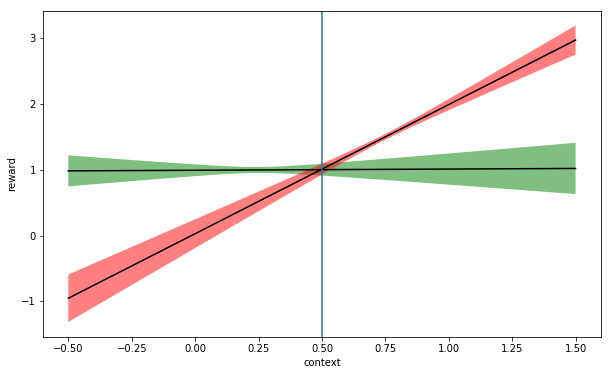

In [7]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')

### Threshold bandit

In [4]:
threshold = 0.8
thresholdbandit = ThresholdBandit(generator, threshold)
print thresholdbandit.threshold
#Step through a bunch of times
for i in range(4000):
    (ctx, arm_idx, obs, regret) = thresholdbandit.step()
    thr = thresholdbandit.threshold
    lb = thresholdbandit.lower_bound
    ub = thresholdbandit.upper_bound
    print("i:%d,ctx:%f,arm:%d,rew:%f,regret:%f,thr:%f,lb:%f,ub:%f"%(i, ctx, arm_idx, obs, regret, thr, lb, ub))

theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

0.8
i:0,ctx:0.096553,arm:0,rew:1.171616,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:1,ctx:0.715863,arm:0,rew:0.950236,regret:0.431726,thr:0.800000,lb:0.000000,ub:1.000000
i:2,ctx:0.578463,arm:0,rew:0.935945,regret:0.156926,thr:0.800000,lb:0.000000,ub:1.000000
i:3,ctx:0.548174,arm:0,rew:1.061580,regret:0.096349,thr:0.800000,lb:0.000000,ub:1.000000
i:4,ctx:0.615045,arm:0,rew:0.835929,regret:0.230090,thr:0.800000,lb:0.000000,ub:1.000000
i:5,ctx:0.490092,arm:0,rew:0.913162,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:6,ctx:0.597122,arm:0,rew:1.039963,regret:0.194243,thr:0.800000,lb:0.000000,ub:1.000000
i:7,ctx:0.962447,arm:1,rew:1.895349,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:8,ctx:0.656752,arm:0,rew:1.013338,regret:0.313503,thr:0.800000,lb:0.000000,ub:1.000000
i:9,ctx:0.956105,arm:1,rew:2.116119,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:10,ctx:0.248039,arm:0,rew:0.955048,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:11,ctx:0.60850

i:97,ctx:0.788094,arm:0,rew:0.992998,regret:0.576188,thr:0.800000,lb:0.000000,ub:1.000000
i:98,ctx:0.079479,arm:0,rew:0.950067,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:99,ctx:0.492529,arm:0,rew:1.110540,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:100,ctx:0.882647,arm:1,rew:1.680867,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:101,ctx:0.457158,arm:0,rew:0.966077,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:102,ctx:0.023707,arm:0,rew:0.922995,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:103,ctx:0.373355,arm:0,rew:1.003855,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:104,ctx:0.154356,arm:0,rew:0.961865,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:105,ctx:0.423863,arm:0,rew:1.133002,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:106,ctx:0.782960,arm:0,rew:0.867762,regret:0.565919,thr:0.800000,lb:0.000000,ub:1.000000
i:107,ctx:0.227503,arm:0,rew:1.145189,regret:0.000000,thr:0.800000,lb:0.000000,ub:1.000000
i:

i:191,ctx:0.589458,arm:0,rew:0.798967,regret:0.178915,thr:0.777778,lb:0.000000,ub:0.777778
i:192,ctx:0.073504,arm:0,rew:1.102869,regret:0.000000,thr:0.777778,lb:0.000000,ub:0.777778
i:193,ctx:0.116922,arm:0,rew:1.097688,regret:0.000000,thr:0.777778,lb:0.000000,ub:0.777778
i:194,ctx:0.569977,arm:0,rew:0.917057,regret:0.139953,thr:0.777778,lb:0.000000,ub:0.777778
i:195,ctx:0.664070,arm:0,rew:0.907337,regret:0.328140,thr:0.777778,lb:0.000000,ub:0.777778
i:196,ctx:0.261951,arm:0,rew:1.009480,regret:0.000000,thr:0.777778,lb:0.000000,ub:0.777778
i:197,ctx:0.012201,arm:0,rew:0.988775,regret:0.000000,thr:0.777778,lb:0.000000,ub:0.777778
i:198,ctx:0.237196,arm:0,rew:1.069806,regret:0.000000,thr:0.777778,lb:0.000000,ub:0.777778
i:199,ctx:0.818176,arm:1,rew:1.714194,regret:0.000000,thr:0.767677,lb:0.000000,ub:0.767677
i:200,ctx:0.738330,arm:0,rew:0.968435,regret:0.476661,thr:0.767677,lb:0.000000,ub:0.767677
i:201,ctx:0.085477,arm:0,rew:1.175285,regret:0.000000,thr:0.767677,lb:0.000000,ub:0.767677

i:285,ctx:0.564237,arm:0,rew:1.148034,regret:0.128474,thr:0.707071,lb:0.000000,ub:0.707071
i:286,ctx:0.288233,arm:0,rew:0.966507,regret:0.000000,thr:0.707071,lb:0.000000,ub:0.707071
i:287,ctx:0.532727,arm:0,rew:0.942687,regret:0.065454,thr:0.707071,lb:0.000000,ub:0.707071
i:288,ctx:0.661964,arm:0,rew:0.974737,regret:0.323928,thr:0.707071,lb:0.000000,ub:0.707071
i:289,ctx:0.953020,arm:1,rew:2.014422,regret:0.000000,thr:0.696970,lb:0.000000,ub:0.696970
i:290,ctx:0.035587,arm:0,rew:1.054362,regret:0.000000,thr:0.696970,lb:0.000000,ub:0.696970
i:291,ctx:0.152219,arm:0,rew:1.037468,regret:0.000000,thr:0.696970,lb:0.000000,ub:0.696970
i:292,ctx:0.281266,arm:0,rew:1.076731,regret:0.000000,thr:0.696970,lb:0.000000,ub:0.696970
i:293,ctx:0.752381,arm:1,rew:1.434283,regret:0.000000,thr:0.696970,lb:0.000000,ub:0.696970
i:294,ctx:0.913831,arm:1,rew:1.782563,regret:0.000000,thr:0.696970,lb:0.000000,ub:0.696970
i:295,ctx:0.617902,arm:0,rew:0.942907,regret:0.235804,thr:0.696970,lb:0.000000,ub:0.696970

i:376,ctx:0.431966,arm:0,rew:1.059778,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:377,ctx:0.496898,arm:0,rew:1.160151,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:378,ctx:0.789305,arm:1,rew:1.361555,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:379,ctx:0.380997,arm:0,rew:0.793427,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:380,ctx:0.975340,arm:1,rew:1.816133,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:381,ctx:0.790042,arm:1,rew:1.508779,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:382,ctx:0.000354,arm:0,rew:1.071103,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:383,ctx:0.757833,arm:1,rew:1.427584,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:384,ctx:0.178787,arm:0,rew:0.945040,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:385,ctx:0.870967,arm:1,rew:1.812310,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768
i:386,ctx:0.334988,arm:0,rew:0.936190,regret:0.000000,thr:0.676768,lb:0.000000,ub:0.676768

i:469,ctx:0.604515,arm:0,rew:0.930974,regret:0.209029,thr:0.666667,lb:0.000000,ub:0.666667
i:470,ctx:0.375895,arm:0,rew:1.199478,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:471,ctx:0.833486,arm:1,rew:1.551853,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:472,ctx:0.664863,arm:0,rew:0.980547,regret:0.329727,thr:0.666667,lb:0.000000,ub:0.666667
i:473,ctx:0.586606,arm:0,rew:0.939669,regret:0.173213,thr:0.666667,lb:0.000000,ub:0.666667
i:474,ctx:0.884917,arm:1,rew:2.043249,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:475,ctx:0.120285,arm:0,rew:1.013680,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:476,ctx:0.991639,arm:1,rew:2.017960,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:477,ctx:0.765916,arm:1,rew:1.628273,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:478,ctx:0.342095,arm:0,rew:1.022893,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667
i:479,ctx:0.842888,arm:1,rew:1.850631,regret:0.000000,thr:0.666667,lb:0.000000,ub:0.666667

i:568,ctx:0.741539,arm:1,rew:1.367244,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:569,ctx:0.211660,arm:0,rew:0.866938,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:570,ctx:0.768863,arm:1,rew:1.536250,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:571,ctx:0.974622,arm:1,rew:2.063923,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:572,ctx:0.526321,arm:0,rew:1.061252,regret:0.052641,thr:0.656566,lb:0.000000,ub:0.656566
i:573,ctx:0.524690,arm:0,rew:1.038808,regret:0.049379,thr:0.656566,lb:0.000000,ub:0.656566
i:574,ctx:0.045536,arm:0,rew:0.878715,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:575,ctx:0.891396,arm:1,rew:1.768247,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:576,ctx:0.239175,arm:0,rew:1.094389,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:577,ctx:0.795582,arm:1,rew:1.513645,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:578,ctx:0.906030,arm:1,rew:1.747107,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566

i:665,ctx:0.741236,arm:1,rew:1.352624,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:666,ctx:0.693702,arm:1,rew:1.413618,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:667,ctx:0.389802,arm:0,rew:1.190993,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:668,ctx:0.556455,arm:0,rew:0.878573,regret:0.112909,thr:0.656566,lb:0.000000,ub:0.656566
i:669,ctx:0.671405,arm:1,rew:1.338905,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:670,ctx:0.772709,arm:1,rew:1.590170,regret:0.000000,thr:0.656566,lb:0.000000,ub:0.656566
i:671,ctx:0.863446,arm:1,rew:1.782307,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:672,ctx:0.151136,arm:0,rew:0.944019,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:673,ctx:0.311120,arm:0,rew:0.951801,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:674,ctx:0.921987,arm:1,rew:1.766676,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:675,ctx:0.361037,arm:0,rew:1.169583,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465

i:763,ctx:0.084931,arm:0,rew:1.013803,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:764,ctx:0.010321,arm:0,rew:1.063507,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:765,ctx:0.265126,arm:0,rew:1.139798,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:766,ctx:0.115794,arm:0,rew:1.214753,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:767,ctx:0.919222,arm:1,rew:1.702981,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:768,ctx:0.233903,arm:0,rew:1.150704,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:769,ctx:0.149550,arm:0,rew:0.999779,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:770,ctx:0.780497,arm:1,rew:1.689170,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:771,ctx:0.750803,arm:1,rew:1.442716,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:772,ctx:0.557813,arm:0,rew:1.101743,regret:0.115627,thr:0.646465,lb:0.000000,ub:0.646465
i:773,ctx:0.857112,arm:1,rew:1.640303,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465

i:862,ctx:0.580664,arm:0,rew:0.970228,regret:0.161329,thr:0.646465,lb:0.000000,ub:0.646465
i:863,ctx:0.961617,arm:1,rew:1.614117,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:864,ctx:0.684929,arm:1,rew:1.431202,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:865,ctx:0.733679,arm:1,rew:1.647046,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:866,ctx:0.161501,arm:0,rew:0.796566,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:867,ctx:0.644321,arm:0,rew:1.080473,regret:0.288643,thr:0.646465,lb:0.000000,ub:0.646465
i:868,ctx:0.614988,arm:0,rew:1.100266,regret:0.229976,thr:0.646465,lb:0.000000,ub:0.646465
i:869,ctx:0.925288,arm:1,rew:1.847841,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:870,ctx:0.235683,arm:0,rew:0.947668,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:871,ctx:0.531946,arm:0,rew:0.997012,regret:0.063892,thr:0.646465,lb:0.000000,ub:0.646465
i:872,ctx:0.426769,arm:0,rew:1.056981,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465

i:954,ctx:0.820370,arm:1,rew:1.715102,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:955,ctx:0.477277,arm:0,rew:0.961260,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:956,ctx:0.837505,arm:1,rew:1.613537,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:957,ctx:0.888237,arm:1,rew:1.778733,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:958,ctx:0.988188,arm:1,rew:1.881338,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:959,ctx:0.275120,arm:0,rew:0.877220,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:960,ctx:0.108382,arm:0,rew:1.062585,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:961,ctx:0.333998,arm:0,rew:0.899935,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:962,ctx:0.586247,arm:0,rew:1.040157,regret:0.172494,thr:0.646465,lb:0.000000,ub:0.646465
i:963,ctx:0.933110,arm:1,rew:1.813350,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465
i:964,ctx:0.362678,arm:0,rew:1.096963,regret:0.000000,thr:0.646465,lb:0.000000,ub:0.646465

i:1051,ctx:0.553806,arm:0,rew:1.078498,regret:0.107612,thr:0.636364,lb:0.000000,ub:0.636364
i:1052,ctx:0.856848,arm:1,rew:1.834055,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1053,ctx:0.046622,arm:0,rew:0.865593,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1054,ctx:0.381714,arm:0,rew:1.094653,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1055,ctx:0.077724,arm:0,rew:1.162945,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1056,ctx:0.028574,arm:0,rew:0.955584,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1057,ctx:0.724528,arm:1,rew:1.387379,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1058,ctx:0.691664,arm:1,rew:1.395132,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1059,ctx:0.723900,arm:1,rew:1.603604,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1060,ctx:0.217833,arm:0,rew:1.148087,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1061,ctx:0.948966,arm:1,rew:1.921608,regret:0.000000,thr:0.636364,lb:0.000000,

i:1145,ctx:0.076502,arm:0,rew:1.086682,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1146,ctx:0.960215,arm:1,rew:1.850463,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1147,ctx:0.812147,arm:1,rew:1.522708,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1148,ctx:0.752505,arm:1,rew:1.296423,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1149,ctx:0.210046,arm:0,rew:1.095666,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1150,ctx:0.196769,arm:0,rew:1.028612,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1151,ctx:0.465174,arm:0,rew:1.053747,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1152,ctx:0.924420,arm:1,rew:1.975936,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1153,ctx:0.185146,arm:0,rew:1.133264,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1154,ctx:0.248194,arm:0,rew:1.008467,regret:0.000000,thr:0.636364,lb:0.000000,ub:0.636364
i:1155,ctx:0.995576,arm:1,rew:1.879750,regret:0.000000,thr:0.636364,lb:0.000000,

i:1241,ctx:0.450565,arm:0,rew:0.965690,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1242,ctx:0.999964,arm:1,rew:2.081554,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1243,ctx:0.718638,arm:1,rew:1.281064,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1244,ctx:0.097968,arm:0,rew:1.081346,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1245,ctx:0.206562,arm:0,rew:0.982501,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1246,ctx:0.112968,arm:0,rew:1.006028,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1247,ctx:0.217997,arm:0,rew:1.043263,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1248,ctx:0.944925,arm:1,rew:1.877501,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1249,ctx:0.876574,arm:1,rew:1.708704,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1250,ctx:0.576722,arm:0,rew:0.838242,regret:0.153445,thr:0.626263,lb:0.000000,ub:0.626263
i:1251,ctx:0.000017,arm:0,rew:0.772986,regret:0.000000,thr:0.626263,lb:0.000000,

i:1335,ctx:0.450525,arm:0,rew:0.875432,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1336,ctx:0.264848,arm:0,rew:0.910499,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1337,ctx:0.680118,arm:1,rew:1.284526,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1338,ctx:0.267113,arm:0,rew:0.923465,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1339,ctx:0.549863,arm:0,rew:0.927354,regret:0.099725,thr:0.626263,lb:0.000000,ub:0.626263
i:1340,ctx:0.695283,arm:1,rew:1.401343,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1341,ctx:0.133098,arm:0,rew:1.033668,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1342,ctx:0.525581,arm:0,rew:0.974308,regret:0.051162,thr:0.626263,lb:0.000000,ub:0.626263
i:1343,ctx:0.388203,arm:0,rew:1.023677,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1344,ctx:0.776716,arm:1,rew:1.490258,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1345,ctx:0.604686,arm:0,rew:0.872614,regret:0.209372,thr:0.626263,lb:0.000000,

i:1427,ctx:0.841516,arm:1,rew:1.749252,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1428,ctx:0.155074,arm:0,rew:1.029580,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1429,ctx:0.819102,arm:1,rew:1.490976,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1430,ctx:0.967327,arm:1,rew:2.005519,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1431,ctx:0.097079,arm:0,rew:1.141121,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1432,ctx:0.456693,arm:0,rew:0.925120,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1433,ctx:0.008491,arm:0,rew:0.985929,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1434,ctx:0.421579,arm:0,rew:0.960731,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1435,ctx:0.375558,arm:0,rew:0.941091,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1436,ctx:0.079760,arm:0,rew:1.079982,regret:0.000000,thr:0.626263,lb:0.000000,ub:0.626263
i:1437,ctx:0.612199,arm:0,rew:0.974013,regret:0.224399,thr:0.626263,lb:0.000000,

i:1518,ctx:0.204622,arm:0,rew:0.884514,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1519,ctx:0.452231,arm:0,rew:0.974577,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1520,ctx:0.277303,arm:0,rew:0.892936,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1521,ctx:0.474483,arm:0,rew:1.171326,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1522,ctx:0.300678,arm:0,rew:1.065511,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1523,ctx:0.226230,arm:0,rew:1.155221,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1524,ctx:0.975331,arm:1,rew:1.868443,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1525,ctx:0.209695,arm:0,rew:0.983350,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1526,ctx:0.017768,arm:0,rew:0.912610,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1527,ctx:0.256883,arm:0,rew:0.979055,regret:0.000000,thr:0.626263,lb:0.010101,ub:0.626263
i:1528,ctx:0.909944,arm:1,rew:1.925291,regret:0.000000,thr:0.626263,lb:0.010101,

i:1615,ctx:0.524556,arm:0,rew:1.102000,regret:0.049111,thr:0.616162,lb:0.050505,ub:0.616162
i:1616,ctx:0.913286,arm:1,rew:1.920126,regret:0.000000,thr:0.616162,lb:0.050505,ub:0.616162
i:1617,ctx:0.116471,arm:0,rew:1.037158,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1618,ctx:0.128250,arm:0,rew:0.991131,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1619,ctx:0.822430,arm:1,rew:1.692159,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1620,ctx:0.913533,arm:1,rew:1.898357,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1621,ctx:0.387081,arm:0,rew:0.868245,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1622,ctx:0.135646,arm:0,rew:0.864158,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1623,ctx:0.022155,arm:0,rew:0.949710,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1624,ctx:0.880161,arm:1,rew:1.704754,regret:0.000000,thr:0.616162,lb:0.060606,ub:0.616162
i:1625,ctx:0.930647,arm:1,rew:1.937789,regret:0.000000,thr:0.616162,lb:0.060606,

i:1705,ctx:0.945029,arm:1,rew:2.093187,regret:0.000000,thr:0.616162,lb:0.090909,ub:0.616162
i:1706,ctx:0.682171,arm:1,rew:1.153953,regret:0.000000,thr:0.616162,lb:0.090909,ub:0.616162
i:1707,ctx:0.305063,arm:0,rew:1.040607,regret:0.000000,thr:0.616162,lb:0.090909,ub:0.616162
i:1708,ctx:0.968040,arm:1,rew:1.949461,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1709,ctx:0.867088,arm:1,rew:1.706101,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1710,ctx:0.181667,arm:0,rew:1.098645,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1711,ctx:0.065063,arm:0,rew:1.085246,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1712,ctx:0.579604,arm:0,rew:0.793862,regret:0.159207,thr:0.616162,lb:0.101010,ub:0.616162
i:1713,ctx:0.168127,arm:0,rew:0.911054,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1714,ctx:0.375582,arm:0,rew:0.916200,regret:0.000000,thr:0.616162,lb:0.101010,ub:0.616162
i:1715,ctx:0.737373,arm:1,rew:1.421027,regret:0.000000,thr:0.616162,lb:0.101010,

i:1801,ctx:0.474429,arm:0,rew:0.771596,regret:0.000000,thr:0.616162,lb:0.121212,ub:0.616162
i:1802,ctx:0.017856,arm:0,rew:1.132998,regret:0.000000,thr:0.616162,lb:0.121212,ub:0.616162
i:1803,ctx:0.232650,arm:0,rew:0.963097,regret:0.000000,thr:0.616162,lb:0.121212,ub:0.616162
i:1804,ctx:0.266464,arm:0,rew:0.853031,regret:0.000000,thr:0.616162,lb:0.121212,ub:0.616162
i:1805,ctx:0.244821,arm:0,rew:1.006038,regret:0.000000,thr:0.616162,lb:0.121212,ub:0.616162
i:1806,ctx:0.686443,arm:1,rew:1.268844,regret:0.000000,thr:0.616162,lb:0.131313,ub:0.616162
i:1807,ctx:0.069339,arm:0,rew:1.093620,regret:0.000000,thr:0.616162,lb:0.131313,ub:0.616162
i:1808,ctx:0.461189,arm:0,rew:1.139591,regret:0.000000,thr:0.616162,lb:0.131313,ub:0.616162
i:1809,ctx:0.736468,arm:1,rew:1.442831,regret:0.000000,thr:0.616162,lb:0.131313,ub:0.616162
i:1810,ctx:0.754618,arm:1,rew:1.666712,regret:0.000000,thr:0.616162,lb:0.131313,ub:0.616162
i:1811,ctx:0.962383,arm:1,rew:2.071683,regret:0.000000,thr:0.616162,lb:0.131313,

i:1894,ctx:0.113776,arm:0,rew:1.128346,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1895,ctx:0.448946,arm:0,rew:0.857742,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1896,ctx:0.390551,arm:0,rew:0.989114,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1897,ctx:0.209725,arm:0,rew:0.968898,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1898,ctx:0.038259,arm:0,rew:0.867918,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1899,ctx:0.336395,arm:0,rew:0.985928,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1900,ctx:0.963141,arm:1,rew:1.911248,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1901,ctx:0.453605,arm:0,rew:1.170867,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1902,ctx:0.645364,arm:1,rew:1.448033,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1903,ctx:0.299991,arm:0,rew:1.059613,regret:0.000000,thr:0.616162,lb:0.151515,ub:0.616162
i:1904,ctx:0.374479,arm:0,rew:1.018620,regret:0.000000,thr:0.616162,lb:0.151515,

i:1990,ctx:0.812936,arm:1,rew:1.635399,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1991,ctx:0.641810,arm:1,rew:1.368648,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1992,ctx:0.770476,arm:1,rew:1.490750,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1993,ctx:0.244219,arm:0,rew:0.925792,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1994,ctx:0.466026,arm:0,rew:1.164664,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1995,ctx:0.343347,arm:0,rew:0.785501,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1996,ctx:0.157723,arm:0,rew:1.069325,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1997,ctx:0.385977,arm:0,rew:1.137952,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1998,ctx:0.191739,arm:0,rew:0.875087,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:1999,ctx:0.204173,arm:0,rew:0.971471,regret:0.000000,thr:0.606061,lb:0.161616,ub:0.606061
i:2000,ctx:0.723491,arm:1,rew:1.671677,regret:0.000000,thr:0.606061,lb:0.161616,

i:2090,ctx:0.344887,arm:0,rew:1.051949,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2091,ctx:0.390467,arm:0,rew:0.893865,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2092,ctx:0.657714,arm:1,rew:1.352048,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2093,ctx:0.555408,arm:0,rew:0.910102,regret:0.110817,thr:0.606061,lb:0.171717,ub:0.606061
i:2094,ctx:0.455991,arm:0,rew:1.024942,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2095,ctx:0.603512,arm:0,rew:0.974657,regret:0.207023,thr:0.606061,lb:0.171717,ub:0.606061
i:2096,ctx:0.844382,arm:1,rew:1.863295,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2097,ctx:0.680594,arm:1,rew:1.499834,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2098,ctx:0.644820,arm:1,rew:1.294221,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2099,ctx:0.184522,arm:0,rew:0.947172,regret:0.000000,thr:0.606061,lb:0.171717,ub:0.606061
i:2100,ctx:0.550418,arm:0,rew:1.004507,regret:0.100837,thr:0.606061,lb:0.171717,

i:2187,ctx:0.696699,arm:1,rew:1.630281,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2188,ctx:0.007747,arm:0,rew:1.106919,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2189,ctx:0.811195,arm:1,rew:1.655301,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2190,ctx:0.483024,arm:0,rew:0.964342,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2191,ctx:0.449685,arm:0,rew:0.967178,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2192,ctx:0.275657,arm:0,rew:0.890850,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2193,ctx:0.215168,arm:0,rew:0.996702,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2194,ctx:0.840652,arm:1,rew:1.804959,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2195,ctx:0.076843,arm:0,rew:0.946071,regret:0.000000,thr:0.606061,lb:0.191919,ub:0.606061
i:2196,ctx:0.553623,arm:0,rew:0.946571,regret:0.107247,thr:0.606061,lb:0.191919,ub:0.606061
i:2197,ctx:0.871618,arm:1,rew:1.871424,regret:0.000000,thr:0.606061,lb:0.191919,

i:2283,ctx:0.553500,arm:0,rew:0.932353,regret:0.107000,thr:0.606061,lb:0.212121,ub:0.606061
i:2284,ctx:0.972343,arm:1,rew:1.936049,regret:0.000000,thr:0.606061,lb:0.212121,ub:0.606061
i:2285,ctx:0.993745,arm:1,rew:2.102308,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2286,ctx:0.383803,arm:0,rew:0.953787,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2287,ctx:0.363546,arm:0,rew:1.082914,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2288,ctx:0.522132,arm:0,rew:0.995456,regret:0.044264,thr:0.606061,lb:0.222222,ub:0.606061
i:2289,ctx:0.853382,arm:1,rew:1.723883,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2290,ctx:0.911798,arm:1,rew:1.875899,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2291,ctx:0.548168,arm:0,rew:1.026605,regret:0.096336,thr:0.606061,lb:0.222222,ub:0.606061
i:2292,ctx:0.265274,arm:0,rew:1.007907,regret:0.000000,thr:0.606061,lb:0.222222,ub:0.606061
i:2293,ctx:0.250176,arm:0,rew:0.788380,regret:0.000000,thr:0.606061,lb:0.222222,

i:2380,ctx:0.594868,arm:0,rew:1.069082,regret:0.189735,thr:0.606061,lb:0.232323,ub:0.606061
i:2381,ctx:0.699710,arm:1,rew:1.251475,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2382,ctx:0.433394,arm:0,rew:0.979923,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2383,ctx:0.142874,arm:0,rew:1.017958,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2384,ctx:0.358022,arm:0,rew:1.048123,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2385,ctx:0.707825,arm:1,rew:1.336028,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2386,ctx:0.420887,arm:0,rew:1.019386,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2387,ctx:0.377234,arm:0,rew:0.968902,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2388,ctx:0.116471,arm:0,rew:0.969929,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2389,ctx:0.343056,arm:0,rew:0.977017,regret:0.000000,thr:0.606061,lb:0.232323,ub:0.606061
i:2390,ctx:0.911414,arm:1,rew:1.854820,regret:0.000000,thr:0.606061,lb:0.232323,

i:2480,ctx:0.281234,arm:0,rew:0.888149,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2481,ctx:0.656762,arm:1,rew:1.159642,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2482,ctx:0.010058,arm:0,rew:0.993629,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2483,ctx:0.314561,arm:0,rew:1.083674,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2484,ctx:0.283400,arm:0,rew:1.015485,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2485,ctx:0.384080,arm:0,rew:0.942163,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2486,ctx:0.143135,arm:0,rew:0.988144,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2487,ctx:0.913769,arm:1,rew:1.762180,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2488,ctx:0.215016,arm:0,rew:1.055041,regret:0.000000,thr:0.595960,lb:0.242424,ub:0.595960
i:2489,ctx:0.579231,arm:0,rew:1.237769,regret:0.158462,thr:0.595960,lb:0.242424,ub:0.595960
i:2490,ctx:0.468726,arm:0,rew:1.000834,regret:0.000000,thr:0.595960,lb:0.242424,

i:2579,ctx:0.468844,arm:0,rew:0.906665,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2580,ctx:0.432997,arm:0,rew:1.128441,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2581,ctx:0.709660,arm:1,rew:1.381974,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2582,ctx:0.031049,arm:0,rew:0.874019,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2583,ctx:0.190541,arm:0,rew:0.998295,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2584,ctx:0.956896,arm:1,rew:1.964081,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2585,ctx:0.711394,arm:1,rew:1.436545,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2586,ctx:0.298284,arm:0,rew:1.134530,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2587,ctx:0.653151,arm:1,rew:1.228073,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2588,ctx:0.428112,arm:0,rew:1.023408,regret:0.000000,thr:0.595960,lb:0.262626,ub:0.595960
i:2589,ctx:0.605492,arm:1,rew:1.245099,regret:0.000000,thr:0.595960,lb:0.262626,

i:2674,ctx:0.486541,arm:0,rew:1.019363,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2675,ctx:0.484705,arm:0,rew:0.939476,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2676,ctx:0.001545,arm:0,rew:1.043768,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2677,ctx:0.558655,arm:0,rew:0.965126,regret:0.117310,thr:0.595960,lb:0.272727,ub:0.595960
i:2678,ctx:0.719838,arm:1,rew:1.343979,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2679,ctx:0.658538,arm:1,rew:1.421536,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2680,ctx:0.139303,arm:0,rew:1.167157,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2681,ctx:0.939258,arm:1,rew:1.779282,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2682,ctx:0.608025,arm:1,rew:1.138971,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2683,ctx:0.189452,arm:0,rew:0.993311,regret:0.000000,thr:0.595960,lb:0.272727,ub:0.595960
i:2684,ctx:0.779541,arm:1,rew:1.632032,regret:0.000000,thr:0.595960,lb:0.272727,

i:2767,ctx:0.654945,arm:1,rew:1.305141,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2768,ctx:0.903965,arm:1,rew:1.848297,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2769,ctx:0.329616,arm:0,rew:1.148742,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2770,ctx:0.405891,arm:0,rew:0.976434,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2771,ctx:0.168697,arm:0,rew:0.961724,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2772,ctx:0.377952,arm:0,rew:1.137329,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2773,ctx:0.897859,arm:1,rew:1.745978,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2774,ctx:0.543612,arm:0,rew:0.931167,regret:0.087225,thr:0.595960,lb:0.282828,ub:0.595960
i:2775,ctx:0.451835,arm:0,rew:0.916262,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2776,ctx:0.387523,arm:0,rew:1.103111,regret:0.000000,thr:0.595960,lb:0.282828,ub:0.595960
i:2777,ctx:0.422781,arm:0,rew:1.083261,regret:0.000000,thr:0.595960,lb:0.282828,

i:2859,ctx:0.966470,arm:1,rew:2.025641,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2860,ctx:0.578977,arm:0,rew:1.110367,regret:0.157955,thr:0.595960,lb:0.292929,ub:0.595960
i:2861,ctx:0.902373,arm:1,rew:1.793848,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2862,ctx:0.626638,arm:1,rew:1.342669,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2863,ctx:0.070219,arm:0,rew:0.935886,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2864,ctx:0.181939,arm:0,rew:0.969377,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2865,ctx:0.855604,arm:1,rew:1.736916,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2866,ctx:0.364736,arm:0,rew:0.987043,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2867,ctx:0.451071,arm:0,rew:0.954339,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2868,ctx:0.857854,arm:1,rew:1.637133,regret:0.000000,thr:0.595960,lb:0.292929,ub:0.595960
i:2869,ctx:0.522970,arm:0,rew:0.828100,regret:0.045940,thr:0.595960,lb:0.292929,

i:2953,ctx:0.587064,arm:0,rew:1.125864,regret:0.174128,thr:0.595960,lb:0.303030,ub:0.595960
i:2954,ctx:0.319370,arm:0,rew:0.964237,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2955,ctx:0.631240,arm:1,rew:1.054531,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2956,ctx:0.041431,arm:0,rew:0.984614,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2957,ctx:0.586020,arm:0,rew:0.888379,regret:0.172041,thr:0.595960,lb:0.303030,ub:0.595960
i:2958,ctx:0.358987,arm:0,rew:0.990409,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2959,ctx:0.390867,arm:0,rew:0.858319,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2960,ctx:0.650792,arm:1,rew:1.379833,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2961,ctx:0.392902,arm:0,rew:0.992143,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2962,ctx:0.639566,arm:1,rew:1.267580,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:2963,ctx:0.865618,arm:1,rew:1.650154,regret:0.000000,thr:0.595960,lb:0.303030,

i:3049,ctx:0.350840,arm:0,rew:0.834386,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3050,ctx:0.101574,arm:0,rew:1.001404,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3051,ctx:0.439702,arm:0,rew:1.072637,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3052,ctx:0.763686,arm:1,rew:1.531825,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3053,ctx:0.710528,arm:1,rew:1.351455,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3054,ctx:0.879625,arm:1,rew:1.664189,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3055,ctx:0.258725,arm:0,rew:0.954563,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3056,ctx:0.951223,arm:1,rew:1.937926,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3057,ctx:0.697520,arm:1,rew:1.448950,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3058,ctx:0.675105,arm:1,rew:1.431314,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3059,ctx:0.976372,arm:1,rew:1.902883,regret:0.000000,thr:0.595960,lb:0.303030,

i:3139,ctx:0.210408,arm:0,rew:0.946689,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3140,ctx:0.143105,arm:0,rew:1.019603,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3141,ctx:0.112014,arm:0,rew:0.874472,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3142,ctx:0.490332,arm:0,rew:0.913477,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3143,ctx:0.822109,arm:1,rew:1.751130,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3144,ctx:0.075352,arm:0,rew:0.892310,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3145,ctx:0.879227,arm:1,rew:1.741710,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3146,ctx:0.443805,arm:0,rew:1.103415,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3147,ctx:0.866791,arm:1,rew:1.673251,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3148,ctx:0.846632,arm:1,rew:1.823829,regret:0.000000,thr:0.595960,lb:0.303030,ub:0.595960
i:3149,ctx:0.284824,arm:0,rew:1.060269,regret:0.000000,thr:0.595960,lb:0.303030,

i:3234,ctx:0.505029,arm:0,rew:0.817420,regret:0.010058,thr:0.595960,lb:0.313131,ub:0.595960
i:3235,ctx:0.586920,arm:0,rew:0.983329,regret:0.173841,thr:0.595960,lb:0.313131,ub:0.595960
i:3236,ctx:0.814304,arm:1,rew:1.519151,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3237,ctx:0.239400,arm:0,rew:1.041757,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3238,ctx:0.480853,arm:0,rew:1.027448,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3239,ctx:0.171705,arm:0,rew:0.984799,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3240,ctx:0.955135,arm:1,rew:1.931687,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3241,ctx:0.489578,arm:0,rew:1.140414,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3242,ctx:0.151970,arm:0,rew:1.108583,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3243,ctx:0.687190,arm:1,rew:1.528632,regret:0.000000,thr:0.595960,lb:0.313131,ub:0.595960
i:3244,ctx:0.309988,arm:0,rew:1.026244,regret:0.000000,thr:0.595960,lb:0.313131,

i:3325,ctx:0.745432,arm:1,rew:1.636976,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3326,ctx:0.521126,arm:0,rew:0.907879,regret:0.042251,thr:0.595960,lb:0.323232,ub:0.595960
i:3327,ctx:0.061591,arm:0,rew:1.075084,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3328,ctx:0.390268,arm:0,rew:0.861700,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3329,ctx:0.633414,arm:1,rew:1.236140,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3330,ctx:0.233112,arm:0,rew:1.094498,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3331,ctx:0.602274,arm:1,rew:1.366049,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3332,ctx:0.587448,arm:0,rew:0.836036,regret:0.174896,thr:0.595960,lb:0.323232,ub:0.595960
i:3333,ctx:0.593716,arm:0,rew:1.100205,regret:0.187433,thr:0.595960,lb:0.323232,ub:0.595960
i:3334,ctx:0.049906,arm:0,rew:0.946221,regret:0.000000,thr:0.595960,lb:0.323232,ub:0.595960
i:3335,ctx:0.535859,arm:0,rew:1.285058,regret:0.071717,thr:0.595960,lb:0.323232,

i:3419,ctx:0.500845,arm:0,rew:1.178844,regret:0.001691,thr:0.585859,lb:0.323232,ub:0.585859
i:3420,ctx:0.832406,arm:1,rew:1.709353,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3421,ctx:0.599803,arm:1,rew:1.273290,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3422,ctx:0.223403,arm:0,rew:0.831824,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3423,ctx:0.678507,arm:1,rew:1.375326,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3424,ctx:0.564526,arm:0,rew:1.023940,regret:0.129053,thr:0.585859,lb:0.323232,ub:0.585859
i:3425,ctx:0.916330,arm:1,rew:1.804169,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3426,ctx:0.060402,arm:0,rew:0.925678,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3427,ctx:0.894091,arm:1,rew:1.706250,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3428,ctx:0.327081,arm:0,rew:1.105583,regret:0.000000,thr:0.585859,lb:0.323232,ub:0.585859
i:3429,ctx:0.302668,arm:0,rew:0.906675,regret:0.000000,thr:0.585859,lb:0.323232,

i:3520,ctx:0.649426,arm:1,rew:1.311962,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3521,ctx:0.042999,arm:0,rew:0.853187,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3522,ctx:0.697820,arm:1,rew:1.428449,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3523,ctx:0.377030,arm:0,rew:0.863004,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3524,ctx:0.158911,arm:0,rew:0.938607,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3525,ctx:0.785939,arm:1,rew:1.559379,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3526,ctx:0.561939,arm:0,rew:1.035020,regret:0.123877,thr:0.585859,lb:0.333333,ub:0.585859
i:3527,ctx:0.058586,arm:0,rew:1.010496,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3528,ctx:0.478529,arm:0,rew:1.104833,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3529,ctx:0.098167,arm:0,rew:0.962971,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3530,ctx:0.344109,arm:0,rew:0.831213,regret:0.000000,thr:0.585859,lb:0.333333,

i:3614,ctx:0.920759,arm:1,rew:1.823475,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3615,ctx:0.846377,arm:1,rew:1.757483,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3616,ctx:0.467867,arm:0,rew:0.783642,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3617,ctx:0.317105,arm:0,rew:0.863014,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3618,ctx:0.559180,arm:0,rew:1.062399,regret:0.118361,thr:0.585859,lb:0.333333,ub:0.585859
i:3619,ctx:0.933141,arm:1,rew:1.751705,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3620,ctx:0.420691,arm:0,rew:0.953715,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3621,ctx:0.371277,arm:0,rew:1.157333,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3622,ctx:0.740824,arm:1,rew:1.537908,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3623,ctx:0.194645,arm:0,rew:1.112371,regret:0.000000,thr:0.585859,lb:0.333333,ub:0.585859
i:3624,ctx:0.797147,arm:1,rew:1.550990,regret:0.000000,thr:0.585859,lb:0.333333,

i:3710,ctx:0.684488,arm:1,rew:1.585842,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3711,ctx:0.323925,arm:0,rew:1.055504,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3712,ctx:0.778398,arm:1,rew:1.538208,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3713,ctx:0.848258,arm:1,rew:1.870088,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3714,ctx:0.288884,arm:0,rew:1.113520,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3715,ctx:0.365800,arm:0,rew:1.026215,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3716,ctx:0.678808,arm:1,rew:1.441132,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3717,ctx:0.277737,arm:0,rew:1.113164,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3718,ctx:0.173859,arm:0,rew:1.080667,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3719,ctx:0.972468,arm:1,rew:1.968588,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3720,ctx:0.717485,arm:1,rew:1.513688,regret:0.000000,thr:0.585859,lb:0.343434,

i:3806,ctx:0.189723,arm:0,rew:0.978956,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3807,ctx:0.973128,arm:1,rew:1.980442,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3808,ctx:0.755023,arm:1,rew:1.482228,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3809,ctx:0.517410,arm:0,rew:0.833781,regret:0.034820,thr:0.585859,lb:0.343434,ub:0.585859
i:3810,ctx:0.302303,arm:0,rew:0.994859,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3811,ctx:0.627865,arm:1,rew:1.245020,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3812,ctx:0.779986,arm:1,rew:1.600334,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3813,ctx:0.078739,arm:0,rew:0.910822,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3814,ctx:0.573002,arm:0,rew:0.985178,regret:0.146003,thr:0.585859,lb:0.343434,ub:0.585859
i:3815,ctx:0.957335,arm:1,rew:1.971599,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3816,ctx:0.675089,arm:1,rew:1.223013,regret:0.000000,thr:0.585859,lb:0.343434,

i:3902,ctx:0.806079,arm:1,rew:1.778729,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3903,ctx:0.078305,arm:0,rew:0.977110,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3904,ctx:0.568478,arm:0,rew:0.917660,regret:0.136956,thr:0.585859,lb:0.343434,ub:0.585859
i:3905,ctx:0.305468,arm:0,rew:0.932704,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3906,ctx:0.664117,arm:1,rew:1.332270,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3907,ctx:0.703139,arm:1,rew:1.497026,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3908,ctx:0.033044,arm:0,rew:1.128653,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3909,ctx:0.048461,arm:0,rew:0.973396,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3910,ctx:0.418918,arm:0,rew:1.027210,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3911,ctx:0.090726,arm:0,rew:0.832656,regret:0.000000,thr:0.585859,lb:0.343434,ub:0.585859
i:3912,ctx:0.662621,arm:1,rew:1.210265,regret:0.000000,thr:0.585859,lb:0.353535,

i:3994,ctx:0.569818,arm:0,rew:1.102715,regret:0.139636,thr:0.585859,lb:0.353535,ub:0.585859
i:3995,ctx:0.230944,arm:0,rew:0.935817,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3996,ctx:0.992787,arm:1,rew:1.925271,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3997,ctx:0.610666,arm:1,rew:1.295598,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3998,ctx:0.697655,arm:1,rew:1.409348,regret:0.000000,thr:0.585859,lb:0.353535,ub:0.585859
i:3999,ctx:0.529197,arm:0,rew:0.948916,regret:0.058394,thr:0.585859,lb:0.353535,ub:0.585859


NameError: name 'linucb' is not defined

In [9]:
theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

[[ 0.02836178]
 [ 1.96047913]
 [ 0.99142178]
 [ 0.01836022]]


In [10]:
#Make plots of LinUCB confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = thresholdbandit.predict(xvals[i], arm_idx)
        preds_up[i,arm_idx] = thresholdbandit.predict_upper(xvals[i], arm_idx)
        preds_low[i,arm_idx] = thresholdbandit.predict_lower(xvals[i], arm_idx)

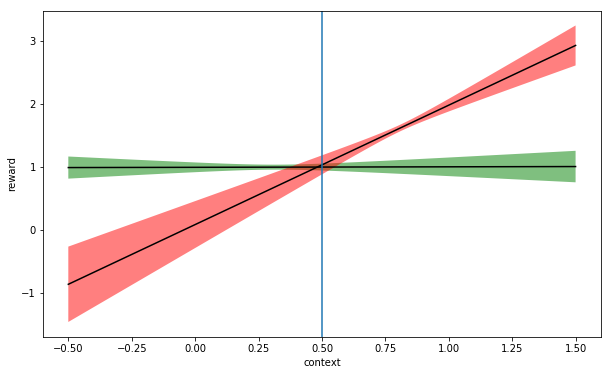

In [11]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')
plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')
plt.axvline(x = 0.5)
plt.xlabel('context')
plt.ylabel('reward')

In [9]:
self = thresholdbandit
minmax = np.zeros((self.xvals.shape[0], 2))
minmax[:, 0] = [self.predict_lower(i, 0) - self.predict_upper(i, 1) for i in self.xvals]
minmax[:, 1] = [self.predict_lower(i, 1) - self.predict_upper(i, 0) for i in self.xvals]

In [11]:
np.all(minmax<0)

True

## Comparison of the two methods

Animation of convergence

Trade-off between convergence rate, risk, and confidence level